#### Libraries used

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import datetime

# Exploratory Data Analysis (EDA)

#### Create new dataframe for exploration/manipulation

In [2]:
e_commerce_df1 = pd.read_csv('../datasets/e_commerce_clean_non_null.csv', index_col=0)

In [3]:
# Create month/year column for future grouping
e_commerce_df1['invoice_year_month'] = pd.to_datetime(e_commerce_df1['invoice_date']).dt.to_period('M')

In [4]:
# Create year column for future grouping
e_commerce_df1['invoice_year'] = pd.to_datetime(e_commerce_df1['invoice_date']).dt.year

In [5]:
# Create month column for future grouping
e_commerce_df1['invoice_month'] = pd.to_datetime(e_commerce_df1['invoice_date']).dt.month

In [6]:
# Create hour column for future grouping
e_commerce_df1['invoice_hour'] = pd.to_datetime(e_commerce_df1['invoice_date']).dt.hour

In [7]:
# Create day column for future grouping
e_commerce_df1['invoice_day'] = pd.to_datetime(e_commerce_df1['invoice_date']).dt.strftime("%A")

In [8]:
e_commerce_df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_year_month,invoice_year,invoice_month,invoice_hour,invoice_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,2010,12,8,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010,12,8,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,2010,12,8,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010,12,8,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010,12,8,Wednesday


## Revenue column

We define revenue as *quantity* **x** *unit_price*

In [9]:
# Create product revenue column by multiplying 'quantity' with 'unit_price'
e_commerce_df1['revenue'] = e_commerce_df1.quantity * e_commerce_df1.unit_price

In [10]:
e_commerce_df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_year_month,invoice_year,invoice_month,invoice_hour,invoice_day,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,2010,12,8,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010,12,8,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,2010,12,8,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010,12,8,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010,12,8,Wednesday,20.34


In [11]:
# Re-order columns to make it more logical

e_commerce_df1 = e_commerce_df1[['customer_id', 'invoice_no', 'invoice_date', 'invoice_year_month', 
                                 'invoice_year', 'invoice_month','invoice_hour','invoice_day', 'stock_code', 
                                 'description','quantity', 'unit_price', 'revenue','country']]

In [12]:
e_commerce_df1.head()

,customer_id,invoice_no,invoice_date,invoice_year_month,invoice_year,invoice_month,invoice_hour,invoice_day,stock_code,description,quantity,unit_price,revenue,country
0,17850,536365,2010-12-01 08:26:00,2010-12,2010,12,8,Wednesday,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,United Kingdom
1,17850,536365,2010-12-01 08:26:00,2010-12,2010,12,8,Wednesday,71053,WHITE METAL LANTERN,6,3.39,20.34,United Kingdom
2,17850,536365,2010-12-01 08:26:00,2010-12,2010,12,8,Wednesday,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,United Kingdom
3,17850,536365,2010-12-01 08:26:00,2010-12,2010,12,8,Wednesday,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,United Kingdom
4,17850,536365,2010-12-01 08:26:00,2010-12,2010,12,8,Wednesday,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,United Kingdom


#### Export cleaned dataset

In [13]:
e_commerce_df1.to_csv('../datasets/e_commerce_add_revenue.csv')

## Timeframe

In [14]:
# Timeframe of all orders within our dataframe

print('Transactions occur between', e_commerce_df1.invoice_date.min(), 'and', e_commerce_df1.invoice_date.max())

Transactions occur between 2010-12-01 08:26:00 and 2011-12-09 12:50:00


We see that we have data on approx 400K orders that occured in around 1 year

# Transactions by country

Here we will have a more in depth look at orders and revenue by country. This, even though straight forward, gives us a clear starting point on where the efforts of the company should be directed or rather *redirected*.

We decide to include and exclude the United Kingdom in our EDA as the company's headquarters are in the United Kingdom and hence it will most probably provide the highest revenue and total order quantities.

## Total revenue by country (*Including the United Kingdom*)

In [15]:
# Create a dataframe that groups revenue by country
country_revenue = pd.pivot_table(e_commerce_df1, values='revenue', index='country', aggfunc=np.sum)

In [16]:
# Rounding revenue values
country_revenue = country_revenue.apply(lambda x: round(x), axis=1)

In [17]:
# Sor by descending order of revenue
country_revenue = country_revenue.sort_values(by='revenue', ascending = False).reset_index()

In [18]:
country_revenue.head()

,country,revenue
0,United Kingdom,7308392.0
1,Netherlands,285446.0
2,EIRE,265546.0
3,Germany,228867.0
4,France,209024.0


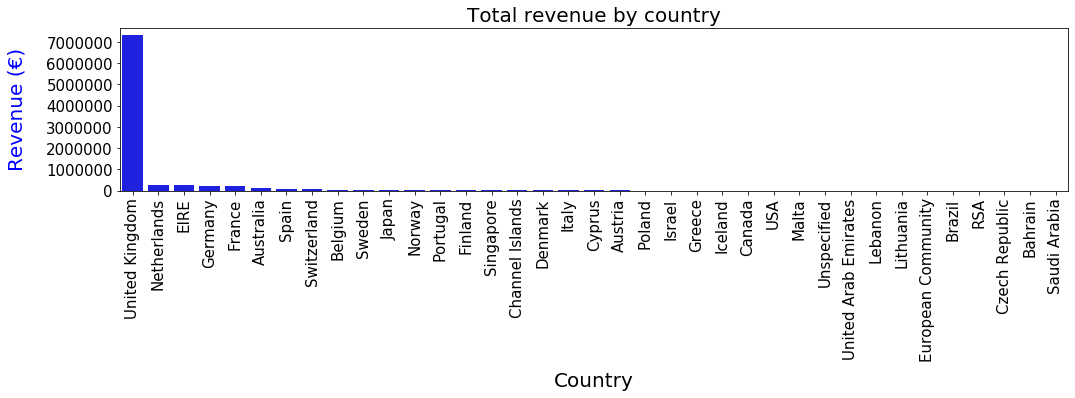

In [19]:
# Plot revenue by country in descending order

fig,ax = plt.subplots(figsize=(17,3))

ax = sns.barplot(x='country', y="revenue", data=country_revenue, color = 'blue')
ax.set_xlabel("Country",fontsize=20, labelpad = 10)
ax.set_ylabel("Revenue (€)", color='blue', fontsize=20, labelpad = 20)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Total revenue by country', fontsize = 20)
plt.savefig("../images/charts/total_revenue_by_country.png", bbox_inches='tight', dpi=300)
plt.show()


We can clearly see that there is a bias toward orders from the United Kingdom given this retailer is based in the United Kingdom.

Here we see that the top five countries in terms of **revenue volumn** are:
- United Kingdom
- Netherlands
- EIRE (Ireland)
- Germany
- France

## Total orders by country (*Including the United Kingdom*)

In [20]:
# Groupby invoice_no to get a count for each record
country_orders = pd.pivot_table(e_commerce_df1, values='invoice_no', index='country', aggfunc=np.count_nonzero)

In [21]:
# Change column name
country_orders.columns = ['total_orders']

In [22]:
# Sort total_orders in descending order
country_orders = country_orders.sort_values(by='total_orders', ascending = False).reset_index()

In [23]:
country_orders.head()

,country,total_orders
0,United Kingdom,354321
1,Germany,9040
2,France,8341
3,EIRE,7236
4,Spain,2484


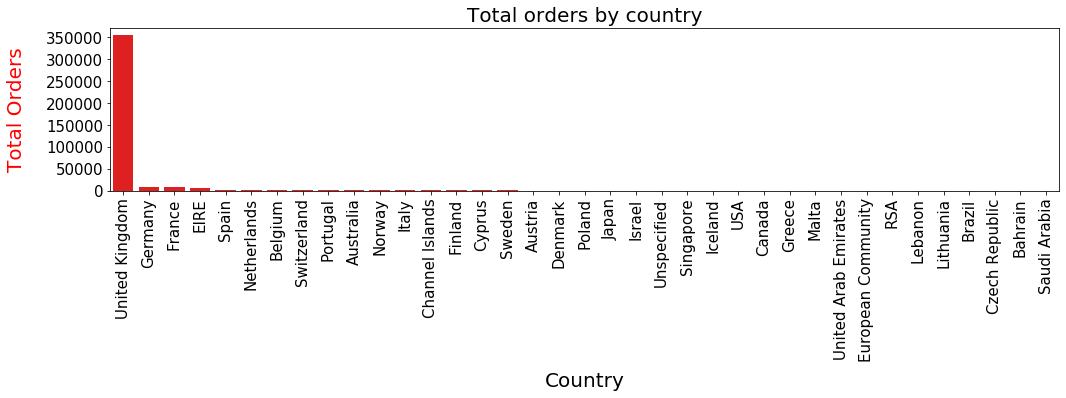

In [24]:
# Plot total_orders by country in descending order

plt.figure(figsize=(17,3))

ax = sns.barplot(x='country', y="total_orders", data = country_orders, color = 'red')
ax.set_xlabel("Country", fontsize=20, labelpad = 10)
ax.set_ylabel("Total Orders", color = 'red', fontsize=20, labelpad = 20)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Total orders by country', fontsize = 20)
plt.savefig("../images/charts/total_orders_by_country.png", bbox_inches='tight', dpi=300)
plt.show()

Again, we can clearly see that there is a bias toward orders from the United Kingdom given this retailer is based in the United Kingdom.

Here we see that the top five countries in terms of **order volumn** are:
- United Kingdom
- Germany
- France
- EIRE
- Spain

## Total revenue by country (*Excluding the United Kingdom*)

In [25]:
# Grouping country by revenue EXCLUDING the United Kingdom
country_revenue_exc_UK = pd.pivot_table(e_commerce_df1[e_commerce_df1['country']!='United Kingdom'], values='revenue', index='country', aggfunc=np.sum)
country_revenue_exc_UK = country_revenue_exc_UK.apply(lambda x: round(x), axis=1)
country_revenue_exc_UK = country_revenue_exc_UK.sort_values(by='revenue', ascending = False).reset_index()

In [26]:
country_revenue_exc_UK.head()

,country,revenue
0,Netherlands,285446.0
1,EIRE,265546.0
2,Germany,228867.0
3,France,209024.0
4,Australia,138521.0


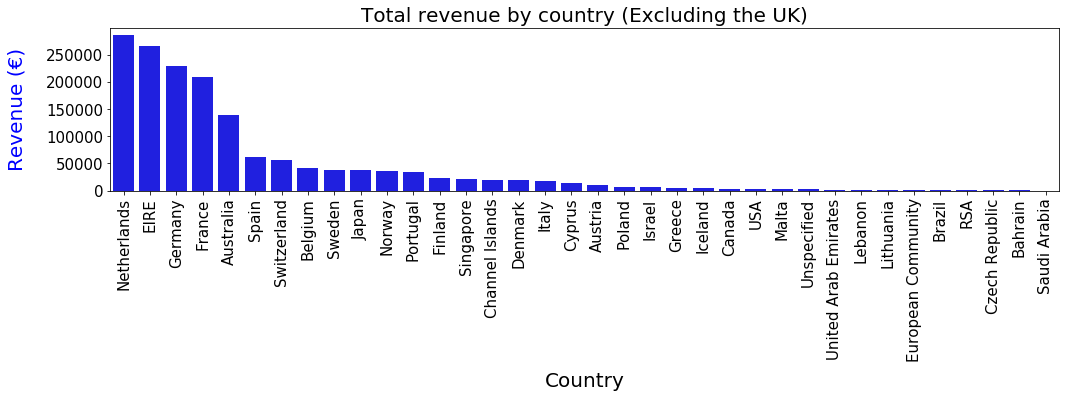

In [27]:
# Plot revenue by country in descending order EXCLUDING the United Kingdom

plt.figure(figsize=(17,3))

ax = sns.barplot(x='country', y="revenue", data = country_revenue_exc_UK, color = 'blue')
ax.set_xlabel("Country",fontsize=20, labelpad = 10)
ax.set_ylabel("Revenue (€)",fontsize=20, color = 'blue', labelpad = 20)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Total revenue by country (Excluding the UK)', fontsize = 20)
plt.savefig("../images/charts/total_revenue_by_country_exc_uk.png", bbox_inches='tight', dpi=300)
plt.show()

Here we see that the top five countries in terms of **revenue volumn** are:
- Netherlands
- EIRE (Ireland)
- Germany
- France
- Australia

## Total orders by country (*Excluding the United Kingdom*)

In [28]:
# Groupby invoice_no to get a count for each record
country_orders_exc_UK = pd.pivot_table(e_commerce_df1[e_commerce_df1['country']!='United Kingdom'], values='invoice_no', index='country', aggfunc=np.count_nonzero)

In [29]:
# Change column name
country_orders_exc_UK.columns = ['total_orders']

In [30]:
# Sort total_orders in descending order
country_orders_exc_UK = country_orders_exc_UK.sort_values(by='total_orders', ascending = False).reset_index()

In [31]:
country_orders_exc_UK.head()

,country,total_orders
0,Germany,9040
1,France,8341
2,EIRE,7236
3,Spain,2484
4,Netherlands,2359


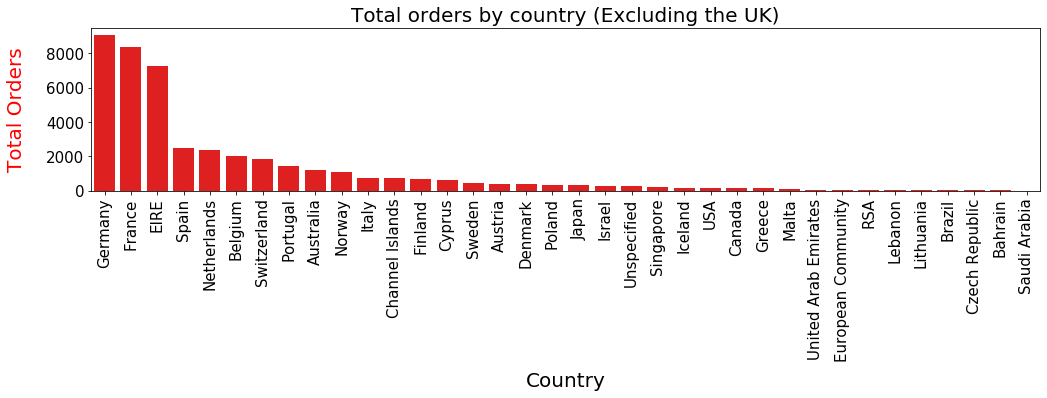

In [32]:
plt.figure(figsize=(17,3))

ax = sns.barplot(x='country', y="total_orders", data = country_orders_exc_UK, color = 'red')
ax.set_xlabel("Country",fontsize=20, labelpad = 10)
ax.set_ylabel("Total Orders",fontsize=20, color = 'red', labelpad = 20)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Total orders by country (Excluding the UK)', fontsize = 20)
plt.savefig("../images/charts/total_orders_by_country_exc_uk.png", bbox_inches='tight', dpi=300)
plt.show()

Here we see that the top five countries in terms of order volumn are:
- Germany
- France
- EIRE (Ireland)
- Spain
- Netherlands


# A look into seasonality

## Orders and Revenue by year_month

We take a look at the absolute numbers of total orders and total revenue over the given timeframe in order to get a sense for the growth of the company in general. Are they making more revenue? Are they selling more units?

In [33]:
# Group total_orders and revenue by invoice_year_month
orders_by_year_month = e_commerce_df1.groupby('invoice_year_month').agg({'invoice_no': 'count', 'revenue':'sum'}).reset_index()

In [34]:
# Rename columns
orders_by_year_month.columns = ['invoice_year_month','total_orders', 'revenue']

In [35]:
# Change year_month type to string for plotting purposes
orders_by_year_month.invoice_year_month = orders_by_year_month.invoice_year_month.astype(str)

In [36]:
orders_by_year_month.tail()

,invoice_year_month,total_orders,revenue
8,2011-08,27007,645343.900
9,2011-09,40028,952838.382
10,2011-10,49554,1039318.790
11,2011-11,64531,1161817.380
12,2011-12,17304,518192.790


In [37]:
# Drop December because it is incomplete
orders_by_year_month.drop([12], inplace = True)

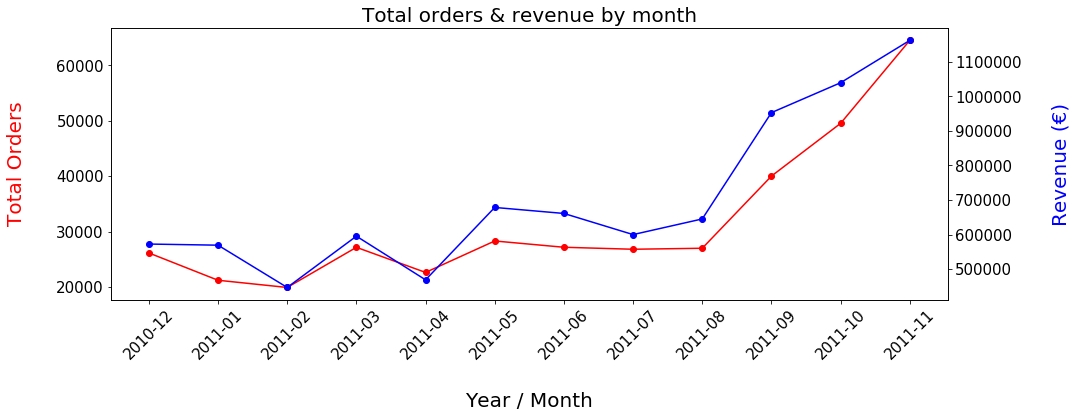

In [38]:
# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15,5))

# Plot 1: Year/month vs. Total Orders
ax.plot(orders_by_year_month.invoice_year_month, orders_by_year_month.total_orders, color="red", marker="o")
# Set x-axis label
ax.set_xlabel("Year / Month",fontsize = 20, labelpad = 30)
# Set x-axis ticks
plt.xticks(rotation = 45, fontsize = 15)
# Set y-axis label
ax.set_ylabel("Total Orders", color='red',fontsize = 20, labelpad = 30)
# Set y-axis ticks
plt.yticks(fontsize=15)
# Remove gridlines
plt.grid(False)

# Plot 2: Year/month vs. Revenue
ax1 = ax.twinx()
# Make a plot with different y-axis using second axis object
ax1.plot(orders_by_year_month.invoice_year_month, orders_by_year_month.revenue,color="blue",marker="o")
ax1.set_ylabel("Revenue (€)",color="blue",fontsize=20, labelpad = 30)
plt.yticks(fontsize=15)
# Remove gridlines
plt.grid(False)

plt.title('Total orders & revenue by month', fontsize = 20)
plt.savefig("../images/charts/total_orders_by_year_month.png", bbox_inches='tight', dpi=300)
plt.show()


We can see from the above multi-line chart that overall, both total orders and revenue are increasing with time. There are some noticeable dips that we need to look into further such as 2011-04 to identify why this may be. Moreover, there are steeper growths after 2011-08 which should be also considered.

## Orders and Revenue by hour

We take a look at the absolute numbers of total orders and total revenue over the given timeframe by hour of the day in order to identify best times of the day where total orders and revenue come from.

This is quite important when it comes to capacity management of the company's resources.

In [39]:
# Group total_orders and revenue by invoice_hour
orders_by_hour = e_commerce_df1.groupby('invoice_hour').agg({'invoice_no': 'count', 'revenue':'sum'}).reset_index()

In [40]:
# Rename columns
orders_by_hour.columns = ['invoice_hour','total_orders', 'revenue']

In [41]:
# Change hour type to string for plotting purposes
orders_by_hour.invoice_hour = orders_by_hour.invoice_hour.astype(str)

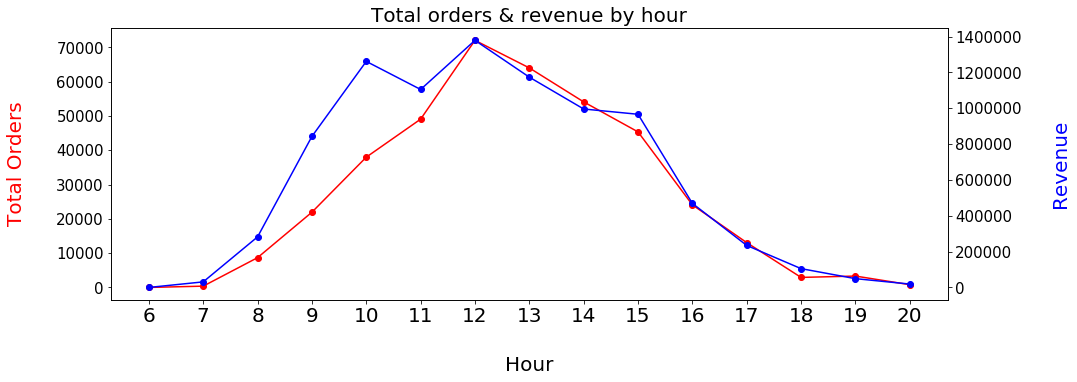

In [42]:
# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15,5))

# Plot 1: Hour vs. Total Orders
ax.plot(orders_by_hour.invoice_hour, orders_by_hour.total_orders, color="red", marker="o")
# Set x-axis label
ax.set_xlabel("Hour",fontsize = 20, labelpad = 30)
plt.xticks(fontsize = 20)
# Set y-axis label
ax.set_ylabel("Total Orders", color='red',fontsize = 20, labelpad = 30)
plt.yticks(fontsize = 15)
# Remove gridlines
plt.grid(False)

# Plot 2: Hour vs. Revenue
ax2=ax.twinx()
# Make a plot with different y-axis using second axis object
ax2.plot(orders_by_hour.invoice_hour, orders_by_hour.revenue,color="blue",marker="o")
ax2.set_ylabel("Revenue",color="blue",fontsize=20, labelpad = 30)
plt.yticks(fontsize=15)
# Remove gridlines
plt.grid(False)

plt.title('Total orders & revenue by hour', fontsize = 20)
plt.savefig("../images/charts/total_orders_by_hour.png", bbox_inches='tight', dpi=300)
plt.show()


It does not come to anyones surprise that total orders and revenie adopt a normal distribution throughout the day's cycle.

On the other hand it is important to note that the highest peak in both orders and revenue comes on 12:00 where all hands on deck should be available plus and minus 2 hours i.e. **10:00 - 14:00**.

## Orders and Revenue by day

In [43]:
# Group total_orders and revenue by invoice_day
orders_by_day = e_commerce_df1.groupby('invoice_day').agg({'invoice_no': 'count', 'revenue':'sum'}).reset_index()


In [44]:
# Rename columns
orders_by_day.columns = ['invoice_day','total_orders', 'revenue']

In [45]:
orders_by_day = orders_by_day.reindex([1,4,5,3,0,2]).reset_index(drop=True)

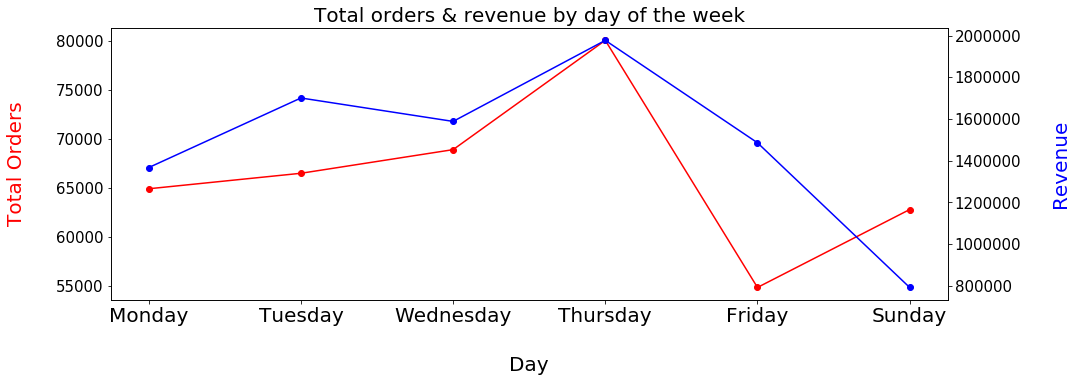

In [46]:
# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15,5))

# Plot 1: day vs. Total Orders
ax.plot(orders_by_day.invoice_day, orders_by_day.total_orders, color="red", marker="o")
# Set x-axis label
ax.set_xlabel("Day",fontsize = 20, labelpad = 30)
plt.xticks(fontsize = 20)
# Set y-axis label
ax.set_ylabel("Total Orders", color='red',fontsize = 20, labelpad = 30)
plt.yticks(fontsize = 15)
# Remove gridlines
plt.grid(False)

# Plot 2: Hour vs. Revenue
ax2=ax.twinx()
# Make a plot with different y-axis using second axis object
ax2.plot(orders_by_day.invoice_day, orders_by_day.revenue,color="blue",marker="o")
ax2.set_ylabel("Revenue",color="blue",fontsize=20, labelpad = 30)
plt.yticks(fontsize=15)
# Remove gridlines
plt.grid(False)

plt.title('Total orders & revenue by day of the week', fontsize = 20)
plt.savefig("../images/charts/total_orders_by_day.png", bbox_inches='tight', dpi=300)
plt.show()


We can take two inputs from the above chart:
- The number of total orders and revenue tend to increase from Monday until Thursday
- There are no orders on a Saturday? Why?

# A look into seasonality by country (Excluding the United Kingdom)

### Total orders by top 5 countries and month (Excluding the United Kingdom)

In [47]:
# Top 5 countries in terms of order volume EXCLUDING United Kingdom
top_5_order_country_filter = ['Germany', 'France', 'EIRE', 'Spain', 'Netherlands']
top_5_order_country = e_commerce_df1[e_commerce_df1.country.isin(top_5_order_country_filter)]

In [48]:
orders_country_year_month = top_5_order_country.groupby(['country', 'invoice_year_month']).agg({'invoice_no': 'count'}).reset_index()

In [49]:
orders_country_year_month.invoice_year_month = orders_country_year_month.invoice_year_month.astype(str)

In [50]:
orders_country_year_month.columns = ['country', 'invoice_year_month', 'total_orders']

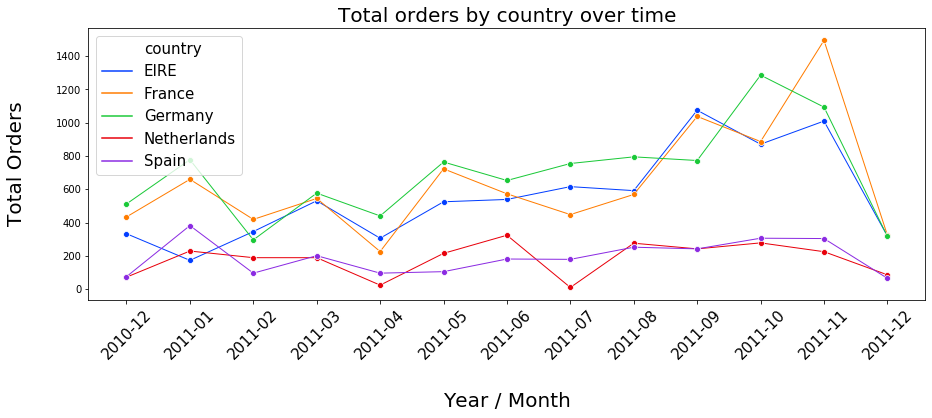

In [51]:
# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15,5))

# Plot 1: Year/month vs. Total Orders
ax = sns.lineplot(x="invoice_year_month", y="total_orders", hue="country", palette = 'bright', marker="o", data = orders_country_year_month, lw=1)
# Set x-axis label
ax.set_xlabel("Year / Month",fontsize=20, labelpad = 30)
plt.xticks(rotation = 45, fontsize=15)
# Set y-axis label
ax.set_ylabel("Total Orders",fontsize=20, labelpad = 30)
plt.yticks(fontsize=10)
# Remove gridlines
plt.grid(False)
plt.title('Total orders by country over time', fontsize = 20)
plt.legend(fontsize=15)
plt.savefig("../images/charts/orders_by_country_by_year_month_exc_uk.png", bbox_inches='tight', dpi=300)
plt.show()


Growth in France, Germany, and Ireland while Spain and the Netherlands are stagnanty with noticeable dips.

#### Total revenue by country and month

In [52]:
revenue_country_year_month = top_5_order_country.groupby(['country', 'invoice_year_month']).agg({'revenue':'sum'}).reset_index()

In [53]:
revenue_country_year_month.invoice_year_month = revenue_country_year_month.invoice_year_month.astype(str)

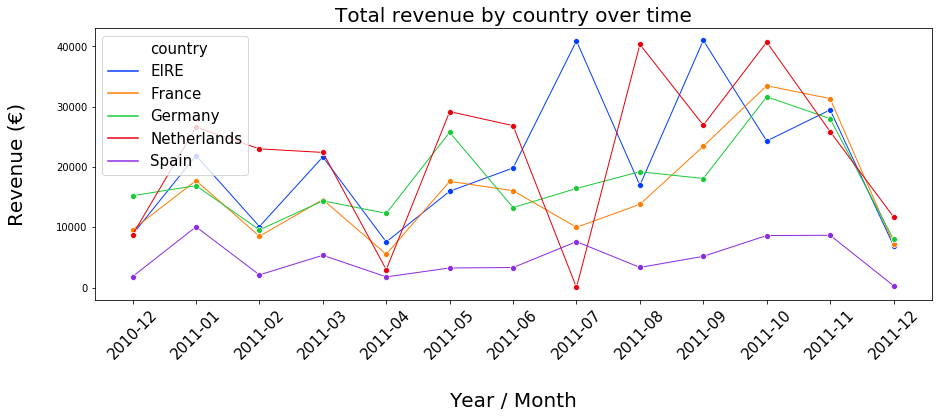

In [54]:
# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15,5))

# Plot 1: Year/month vs. Total Orders
ax = sns.lineplot(x="invoice_year_month", y="revenue", hue="country", palette = 'bright', marker="o", data=revenue_country_year_month, lw=1)
# Set x-axis label
ax.set_xlabel("Year / Month",fontsize=20, labelpad = 30)
plt.xticks(rotation = 45, fontsize=15)
# Set y-axis label
ax.set_ylabel("Revenue (€)",fontsize=20, labelpad = 30)
plt.yticks(fontsize=10)
# Remove gridlines
plt.grid(False)
plt.title('Total revenue by country over time', fontsize = 20)
plt.legend(fontsize=15)
plt.savefig("../images/charts/revenue_by_country_by_year_month_exc_uk.png", bbox_inches='tight', dpi=300)
plt.show()


Clear revenue dips on specific months!

Why happened to customers from the Netherlands in April and July? Marketing efforts?

From this we are able to allocate resources accordingly if there exist a customer service team by country.

The large dips in revenue for the Netherlands and for Ireland can be mitigated somehow.

#### By country and hour

In [55]:
orders_country_hour = top_5_order_country.groupby(['country', 'invoice_hour']).agg({'invoice_no': 'count'}).reset_index()

In [56]:
orders_country_hour.columns = ['country', 'invoice_hour', 'total_orders']

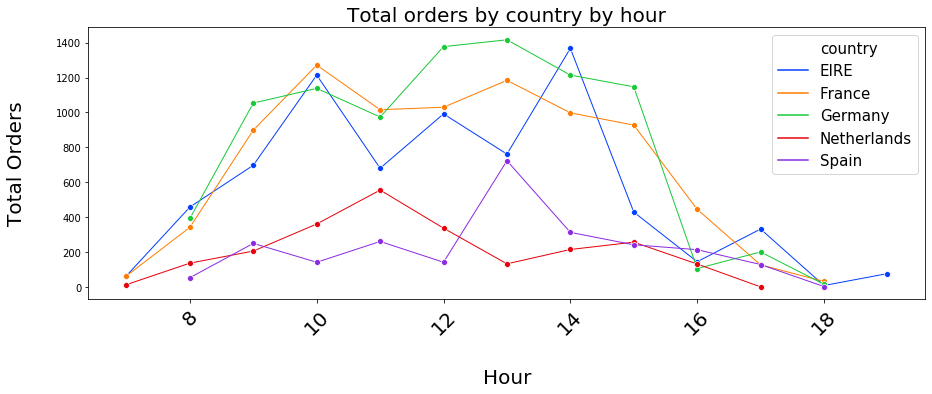

In [57]:
# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15,5))

# Plot 1: Year/month vs. Total Orders
ax = sns.lineplot(x="invoice_hour", y="total_orders", hue="country", palette = 'bright', marker="o", data = orders_country_hour, lw=1)
# Set x-axis label
ax.set_xlabel("Hour",fontsize=20, labelpad = 30)
plt.xticks(rotation = 45, fontsize=20)
# Set y-axis label
ax.set_ylabel("Total Orders",fontsize=20, labelpad = 30)
plt.yticks(fontsize=10)
# Remove gridlines
plt.grid(False)
plt.title('Total orders by country by hour', fontsize = 20)
plt.legend(fontsize=15)
plt.savefig("../images/charts/orders_by_country_by_hour_exc_uk.png", bbox_inches='tight', dpi=300)
plt.show()


Different behaviour at different hours!

Seems like total orders spike at 10am & 2pm for Irish customers while Spanish customers focus their orders around 1pm.

France & Germany seems to place orders all througout the day in a normally distributed manner.

This can also directly affect capacity management and the customer service teams.

## Orders and Revenue Growth Rate

In [58]:
# Monthly percentage change of total orders
orders_by_year_month['order_growth'] = round(orders_by_year_month.total_orders.pct_change(),3)

In [59]:
# Monthly percentage change of revenue
orders_by_year_month['revenue_growth'] = round(orders_by_year_month.revenue.pct_change(),3)

In [60]:
orders_by_year_month

,invoice_year_month,total_orders,revenue,order_growth,revenue_growth
0,2010-12,26157,572713.890,NaN,NaN
1,2011-01,21229,569445.040,-0.188,-0.006
2,2011-02,19927,447137.350,-0.061,-0.215
3,2011-03,27175,595500.760,0.364,0.332
4,2011-04,22642,469200.361,-0.167,-0.212
5,2011-05,28320,678594.560,0.251,0.446
6,2011-06,27185,661213.690,-0.040,-0.026
7,2011-07,26825,600091.011,-0.013,-0.092
8,2011-08,27007,645343.900,0.007,0.075
9,2011-09,40028,952838.382,0.482,0.476


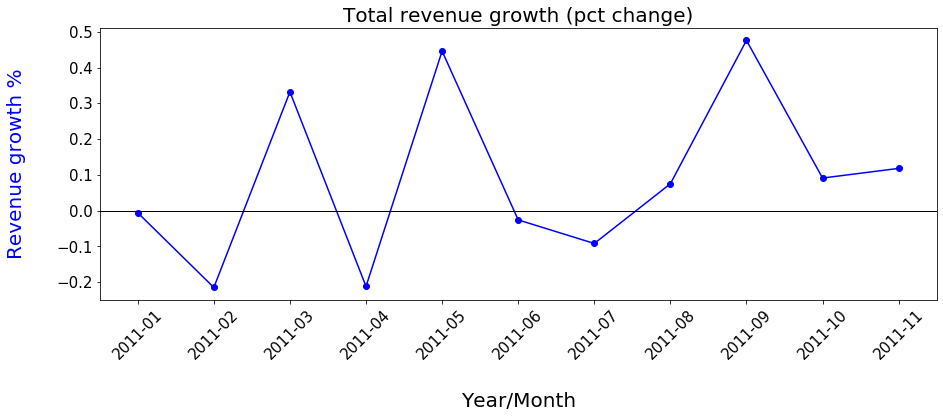

In [61]:
# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15,5))

# Year/month vs. revenue growth
ax.plot(orders_by_year_month.invoice_year_month, orders_by_year_month.revenue_growth, color="blue", marker="o")
# Set x-axis label
ax.set_xlabel("Year/Month",fontsize = 20, labelpad = 30)
# Set x-axis ticks
plt.xticks(rotation = 45, fontsize = 15)
# Set y-axis label
ax.set_ylabel("Revenue growth %", color='blue',fontsize = 20, labelpad = 30)
# Set y-axis ticks
plt.yticks(fontsize=15)
# Remove gridlines
plt.grid(False)

plt.title('Total revenue growth (pct change)', fontsize = 20)
ax.axhline(linewidth=1, color='black')
plt.savefig("../images/charts/revenue_growth_rate.png", bbox_inches='tight', dpi=300)
plt.show()


The months February, April, June, and July have experienced negative revenue growth rates. This probably is associated with total order growth as the two go hand in hand.

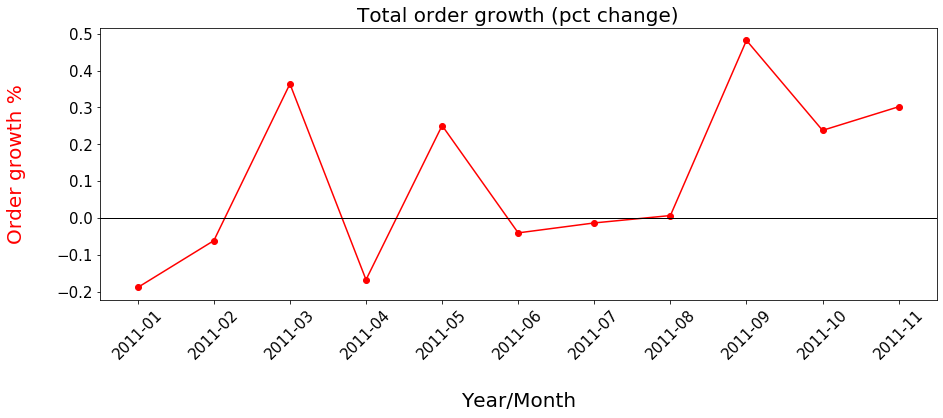

In [62]:
# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15,5))

# Year/month vs. order growth
ax.plot(orders_by_year_month.invoice_year_month, orders_by_year_month.order_growth, color="red", marker="o")
# Set x-axis label
ax.set_xlabel("Year/Month",fontsize = 20, labelpad = 30)
# Set x-axis ticks
plt.xticks(rotation = 45, fontsize = 15)
# Set y-axis label
ax.set_ylabel("Order growth %", color='red',fontsize = 20, labelpad = 30)
# Set y-axis ticks
plt.yticks(fontsize=15)
# Remove gridlines
plt.grid(False)

plt.title('Total order growth (pct change)', fontsize = 20)
ax.axhline(linewidth=1, color='black')
plt.savefig("../images/charts/order_growth_rate.png", bbox_inches='tight', dpi=300)
plt.show()


Overall, when it comes to growth rates we see a positive increase overall over the duration of our data but there are some considerable dips througout. 

Why is this?

Are the dips in revenue and total order growth related to number of active customers?

# Identifying dips in the revenue growth

In order to identify why there are dips, we group by unique customers and total orders by year_month

## Unique customers by year_month

In [63]:
# Group total_orders and revenue by invoice_year_month
customers_by_year_month = e_commerce_df1.groupby('invoice_year_month').nunique()['customer_id'].reset_index()

In [64]:
# Rename columns 
customers_by_year_month.columns = ['invoice_year_month', 'total_active_customers']

In [65]:
# Monthly percentage change of active customers
customers_by_year_month['active_customer_growth'] = round(customers_by_year_month.total_active_customers.pct_change(),3)

In [66]:
# Change invoice_year_month type to string for plotting purposes
customers_by_year_month.invoice_year_month = customers_by_year_month.invoice_year_month.astype(str)

In [67]:
customers_by_year_month.drop([12], inplace = True)

In [68]:
customers_by_year_month

,invoice_year_month,total_active_customers,active_customer_growth
0,2010-12,885,NaN
1,2011-01,741,-0.163
2,2011-02,758,0.023
3,2011-03,974,0.285
4,2011-04,856,-0.121
5,2011-05,1056,0.234
6,2011-06,991,-0.062
7,2011-07,949,-0.042
8,2011-08,935,-0.015
9,2011-09,1266,0.354


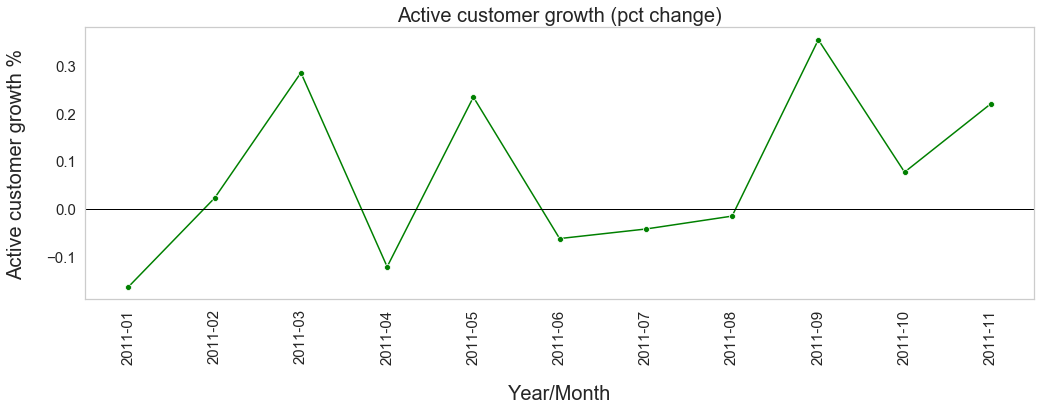

In [69]:
# Plot active customers by month

plt.figure(figsize=(17,5))

sns.set(style="whitegrid")
ax = sns.lineplot(x='invoice_year_month', y="active_customer_growth", data = customers_by_year_month, 
                  color = 'green', marker="o")
ax.set_xlabel("Year/Month",fontsize=20, labelpad = 20)
ax.set_ylabel("Active customer growth %",fontsize=20, labelpad = 20)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Active customer growth (pct change)', fontsize = 20)

ax.axhline(linewidth=1, color='black')
plt.grid(False)
plt.savefig("../images/charts/customer_growth_rate.png", bbox_inches='tight', dpi=300)
plt.show()

As expected, dips in revenue and total orders are associated with dips in customer activity on the same months.

## UPDATE Orders and Revenue by year_month for overlay comparison

In [70]:
def orders_by_time(dataframe):
    '''
    Input: e_commerce_df1 dataframe
    Output: Take the the dataframe and applies groupings on invoice_year_month while
    adding new columns to calculate % growth of order, revenue, and active_customers
    '''
    # Columns to aggregate and how
    col_agg = {
        'invoice_no': 'count',
        'revenue': 'sum',
        'customer_id': 'nunique'
    }
    # Group col_agg by invoice_year_month
    orders_by_year_month = e_commerce_df1.groupby('invoice_year_month').agg(col_agg).reset_index()
    # Rename columns
    orders_by_year_month.columns = ['invoice_year_month','total_orders', 'revenue', 'total_active_customers']
    # Change year_month type to string for plotting purposes
    orders_by_year_month.invoice_year_month = orders_by_year_month.invoice_year_month.astype(str)
    # Drop December because it is incomplete
    orders_by_year_month.drop([12], inplace = True)
    
    # Add new columns
    # Order growth by month
    orders_by_year_month['order_growth'] = round(orders_by_year_month.total_orders.pct_change(),3)
    # Revenue growth by month
    orders_by_year_month['revenue_growth'] = round(orders_by_year_month.revenue.pct_change(),3)
    # Active customer growth by month
    orders_by_year_month['active_customer_growth'] = round(customers_by_year_month.total_active_customers.pct_change(),3)
    
    return orders_by_year_month

In [71]:
orders_by_year_month = orders_by_time(e_commerce_df1)

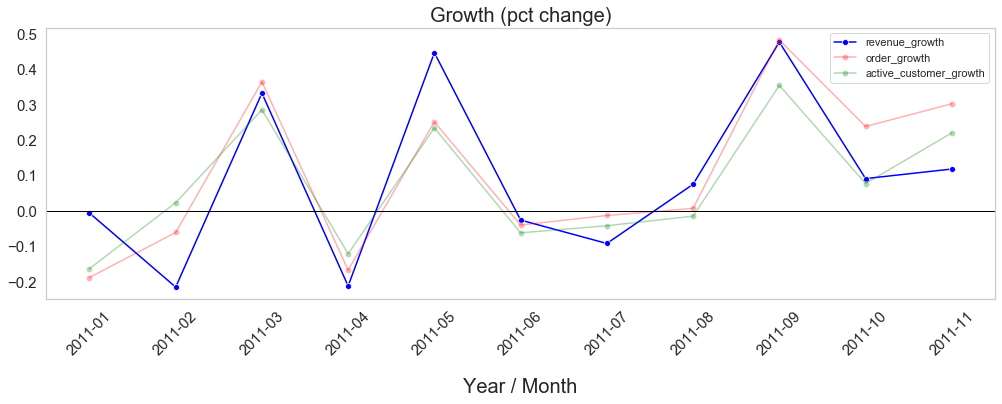

In [72]:
# Plot compare all growth %

plt.figure(figsize=(17,5))

sns.set(style="whitegrid")

ax1 = sns.lineplot(x='invoice_year_month', y="revenue_growth", data = orders_by_year_month, 
                  color = 'blue', marker="o", label = 'revenue_growth')
ax2 = sns.lineplot(x='invoice_year_month', y="order_growth", data = orders_by_year_month, 
                  color = 'red', marker="o", label = 'order_growth', alpha = 0.3)
ax3 = sns.lineplot(x='invoice_year_month', y="active_customer_growth", data = orders_by_year_month, 
                  color = 'green', marker="o", label = 'active_customer_growth', alpha = 0.3)

ax1.set_xlabel("Year / Month",fontsize=20, labelpad = 20)
ax1.set_ylabel("",fontsize=20, labelpad = 20)

plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Growth (pct change)', fontsize = 20)
ax1.axhline(linewidth=1, color='black')
plt.grid(False)
plt.savefig("../images/charts/overall_growth_rate.png", bbox_inches='tight', dpi=300)
plt.show()

In [73]:
round(orders_by_year_month[['order_growth', 'active_customer_growth', 'revenue_growth']].corr(),2)

,order_growth,active_customer_growth,revenue_growth
order_growth,1.00,0.97,0.85
active_customer_growth,0.97,1.00,0.85
revenue_growth,0.85,0.85,1.00


What we can infer from the overlayed line chart above is that any dips in revenue growth are associated with a decrease in orders and active customers for that associated month.

In [74]:
orders_by_year_month

,invoice_year_month,total_orders,revenue,total_active_customers,order_growth,revenue_growth,active_customer_growth
0,2010-12,26157,572713.890,885,NaN,NaN,NaN
1,2011-01,21229,569445.040,741,-0.188,-0.006,-0.163
2,2011-02,19927,447137.350,758,-0.061,-0.215,0.023
3,2011-03,27175,595500.760,974,0.364,0.332,0.285
4,2011-04,22642,469200.361,856,-0.167,-0.212,-0.121
5,2011-05,28320,678594.560,1056,0.251,0.446,0.234
6,2011-06,27185,661213.690,991,-0.040,-0.026,-0.062
7,2011-07,26825,600091.011,949,-0.013,-0.092,-0.042
8,2011-08,27007,645343.900,935,0.007,0.075,-0.015
9,2011-09,40028,952838.382,1266,0.482,0.476,0.354


#### Export orders by year and month to csv

In [75]:
orders_by_year_month.to_csv('../datasets/growth_rates_by_year_month.csv')

# New vs. Existing customers

From the above metrics we can see that revenue growth was associated with number of active customers and their associated orders.

We can take a deeper look into those metrics by trying to separate customers into 'New' and 'Existing' in order to identify if the company is good in attracting new customers and retaining existing ones.

From this we can better understand where the marketing resources should be focused.

First we need to define what is a ***new customer*** and what is an ***existing customer***.

***NEW CUSTOMER***: A customer is classified as *new* if his minimum invoice_year_month date is equal to current invoice_year_month

***EXISTING CUSTOMER***: A customer is classified as *existing* if his minimum invoice_year_month date is less than the current invoice_year_month

Let see this in practice!

In [76]:
# Group customer_id by minimum invoice_date
customer_min_invoice_date = e_commerce_df1.groupby('customer_id').agg({'invoice_date': 'min'}).reset_index()

In [77]:
customer_min_invoice_date['min_invoice_year_month'] = pd.to_datetime(customer_min_invoice_date['invoice_date']).dt.to_period('M')

In [78]:
customer_min_invoice_date.head()

,customer_id,invoice_date,min_invoice_year_month
0,12346,2011-01-18 10:01:00,2011-01
1,12347,2010-12-07 14:57:00,2010-12
2,12348,2010-12-16 19:09:00,2010-12
3,12349,2011-11-21 09:51:00,2011-11
4,12350,2011-02-02 16:01:00,2011-02


In [79]:
customer_min_invoice_date.columns = ['customer_id', 'min_invoice_date', 'min_invoice_year_month']

In order for us to be able to identify new from existing based on our definitions, and to be able to aggregate revenue by this segmentation, we need to merge with the original dataframe on customer_id.

In [80]:
e_commerce_customers = pd.merge(e_commerce_df1, customer_min_invoice_date, on='customer_id')

In [81]:
e_commerce_customers.head()

,customer_id,invoice_no,invoice_date,invoice_year_month,invoice_year,invoice_month,invoice_hour,invoice_day,stock_code,description,quantity,unit_price,revenue,country,min_invoice_date,min_invoice_year_month
0,17850,536365,2010-12-01 08:26:00,2010-12,2010,12,8,Wednesday,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,United Kingdom,2010-12-01 08:26:00,2010-12
1,17850,536365,2010-12-01 08:26:00,2010-12,2010,12,8,Wednesday,71053,WHITE METAL LANTERN,6,3.39,20.34,United Kingdom,2010-12-01 08:26:00,2010-12
2,17850,536365,2010-12-01 08:26:00,2010-12,2010,12,8,Wednesday,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,United Kingdom,2010-12-01 08:26:00,2010-12
3,17850,536365,2010-12-01 08:26:00,2010-12,2010,12,8,Wednesday,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,United Kingdom,2010-12-01 08:26:00,2010-12
4,17850,536365,2010-12-01 08:26:00,2010-12,2010,12,8,Wednesday,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,United Kingdom,2010-12-01 08:26:00,2010-12


We can now apply our user types by 'New' or 'Existing'.

In [82]:
# Create a new columns and fill it all with 'New' user types
e_commerce_customers['user_type'] = 'New'

In [83]:
# Check each cell for invoice_year_month to apply type
e_commerce_customers.loc[e_commerce_customers['invoice_year_month'] 
                         > e_commerce_customers['min_invoice_year_month'], 'user_type'] = 'Existing'

In [84]:
# Check distribution of user_types accross all orders
e_commerce_customers.user_type.value_counts()

Existing    279131
New         118753
Name: user_type, dtype: int64

In [85]:
# Export e_commerce_customers
e_commerce_customers.to_csv('../datasets/e_commerce_add_customer_types.csv')

In [86]:
# Group revenue by user type and by year_month
revenue_by_user_type = e_commerce_customers.groupby(['invoice_year_month', 'user_type']).sum()['revenue'].reset_index()

In [87]:
revenue_by_user_type

,invoice_year_month,user_type,revenue
0,2010-12,New,572713.890
1,2011-01,Existing,276237.690
2,2011-01,New,293207.350
3,2011-02,Existing,288995.280
4,2011-02,New,158142.070
5,2011-03,Existing,395430.800
6,2011-03,New,200069.960
7,2011-04,Existing,347188.870
8,2011-04,New,122011.491
9,2011-05,Existing,554490.780


In [88]:
# We need to drop first and last month as they will distort our data
revenue_by_user_type.drop([0], inplace = True)
revenue_by_user_type.drop([23], inplace = True)
revenue_by_user_type.drop([24], inplace = True)

In [89]:
# Change type to string for plotting purposes
revenue_by_user_type.invoice_year_month = revenue_by_user_type.invoice_year_month.astype(str)

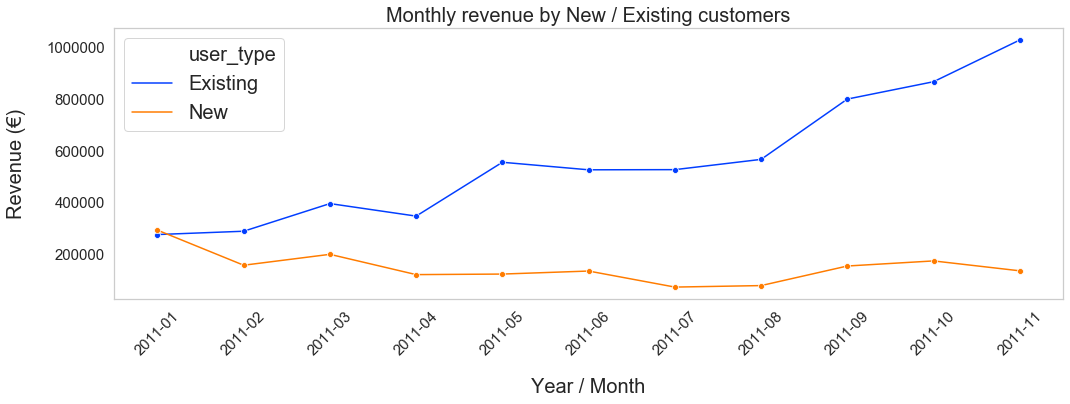

In [90]:
# Plot compare revenue by user_type

plt.figure(figsize=(17,5))

ax1 = sns.lineplot(x='invoice_year_month', y="revenue", data = revenue_by_user_type, 
                   hue='user_type', palette = 'bright', marker="o")

ax1.set_xlabel("Year / Month",fontsize=20, labelpad = 20)
ax1.set_ylabel("Revenue (€)",fontsize=20, labelpad = 20)

plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Monthly revenue by New / Existing customers', fontsize = 20)
plt.grid(b=None)
plt.legend(fontsize=20)
plt.savefig("../images/charts/revenue_by_customer_type.png", bbox_inches='tight', dpi=300)
plt.show()

We can clearly see that our 'Existing' customers are growing positively with time unlike our 'New' customer base which sees a plateau in growth or even a small negative growth. Why?

Do we need better marketing efforts to be put in place?

# New vs. Existing customers by country (excluding the United Kingdom)

In [91]:
# Top five countries in terms of revenue from previous calculations
top_5_revenue_country_filter = ['Netherlands', 'EIRE','Germany', 'France', 'Australia']

In [92]:
# Group revenue by country and user_type
revenue_by_user_type_country = e_commerce_customers.groupby(['country', 'user_type']).sum()['revenue'].reset_index()

In [93]:
# Toip five revenue countries
revenue_by_user_type_top_5_countries = revenue_by_user_type_country[revenue_by_user_type_country.country.isin(top_5_revenue_country_filter)]

In [94]:
revenue_by_user_type_top_5_countries

,country,user_type,revenue
0,Australia,Existing,126951.22
1,Australia,New,11570.09
18,EIRE,Existing,256732.02
19,EIRE,New,8813.88
24,France,Existing,151877.80
25,France,New,57146.25
26,Germany,Existing,161315.51
27,Germany,New,67551.63
42,Netherlands,Existing,274865.68
43,Netherlands,New,10580.66


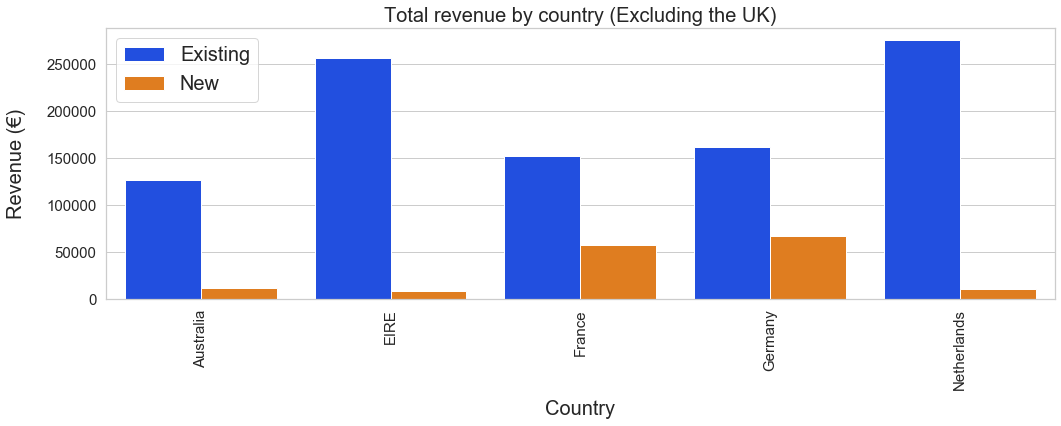

In [95]:
# Plot revenue by country by user_type

plt.figure(figsize=(17,5))

ax = sns.barplot(x='country', y="revenue", hue = 'user_type', 
                 palette = 'bright', data = revenue_by_user_type_top_5_countries)
ax.set_xlabel("Country",fontsize=20, labelpad = 10)
ax.set_ylabel("Revenue (€)",fontsize=20, labelpad = 20)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Total revenue by country (Excluding the UK)', fontsize = 20)
plt.legend(fontsize=20)
plt.show()

We can see a clear increase in revenue from new customers in France and Germany compared to the other countries.

We could learn how customers from those countries are being dealt with or what campaigns they are received in order to reciprocate them on others.